In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [17]:
np.random.seed(23)

#创建数据集
X = np.linspace(-1,1,200)
np.random.shuffle(X)
Y = 0.5 * X + 2 + np.random.normal(0,0.05,(200,))
#plt.scatter(X,Y)
#plt.show()

In [28]:
#创建训练集和测试集
X_train,Y_train = X[:180],Y[:180]
X_test,Y_test = X[160:],Y[160:]


In [29]:
model = Sequential()
model.add(Dense(input_dim=1,units=1))

model.compile(loss='mse',optimizer='sgd')


In [30]:
#开始训练
print('--training--')
for step in range(301):
    cost = model.train_on_batch(X_train,Y_train)
    if step % 100 == 0:
        print('training cost: ',cost)

--training--
training cost:  4.051787
training cost:  0.07855736
training cost:  0.0048987237
training cost:  0.0025799072


In [31]:
print('testing')
cost = model.evaluate(X_test,Y_test,batch_size=40)
print("test cost: ",cost)

W,b = model.layers[0].get_weights()

print('weight: ',W,'b: ',b)


testing
40/40 [==============================] - 0s 650us/step
test cost:  0.001941991737112403
weight:  [[0.4727347]] b:  [1.9992121]


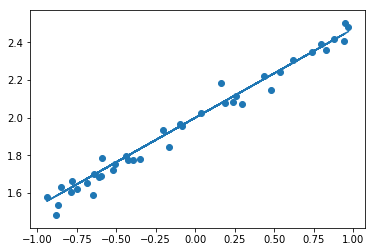

In [32]:
Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred)
plt.show()